# Predictive Battery Health and Anomaly Detection System

## Required Libraries

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

## Simulating EV Telemetry Data

In [2]:
def simulate_ev_data(n_records=10000):
    data = {
        'voltage': np.random.normal(350, 10, n_records),
        'current': np.random.normal(50, 5, n_records),
        'temperature': np.random.normal(30, 5, n_records),
        'state_of_charge': np.random.uniform(10, 100, n_records),
        'charge_cycles': np.random.randint(50, 1000, n_records),
        'ambient_temp': np.random.normal(28, 4, n_records),
        'speed': np.random.normal(45, 10, n_records),
        'payload': np.random.uniform(200, 1000, n_records),
        'trip_distance': np.random.uniform(5, 150, n_records),
        'charging_time': np.random.uniform(20, 240, n_records),
        'battery_health': np.random.uniform(50, 100, n_records)
    }
    return pd.DataFrame(data)

## Generating Data, Saving dataset to CSV & Previewing the first few records

In [3]:
df = simulate_ev_data()%matplotlib inline
plt.figure(figsize=(8,5))
sns.histplot(df['battery_health'], bins=30, kde=True, color='skyblue')
plt.title('Battery Health Distribution')
plt.show()
df.to_csv('ev_telemetry_data.csv', index=False)
df.head()

,voltage,current,temperature,state_of_charge,charge_cycles,ambient_temp,speed,payload,trip_distance,charging_time,battery_health
0,345.524716,42.599330,32.430211,75.896987,831,24.642774,51.135763,754.437796,78.493228,166.414361,79.243421
1,351.040112,56.013746,34.925591,29.528668,844,21.872368,54.089195,648.597889,98.412295,146.511286,67.575626
2,367.043015,47.051998,24.723075,50.065031,94,26.826334,49.553491,672.869369,89.479559,164.375799,71.341589
3,352.594389,47.852811,22.179899,61.005505,254,17.163916,35.696708,654.968697,67.830523,185.502062,50.234304
4,322.605061,54.348331,33.381851,55.360505,370,28.379814,41.027087,216.484132,76.169629,130.826683,57.870193


## Visualizations

<Figure size 800x500 with 0 Axes>

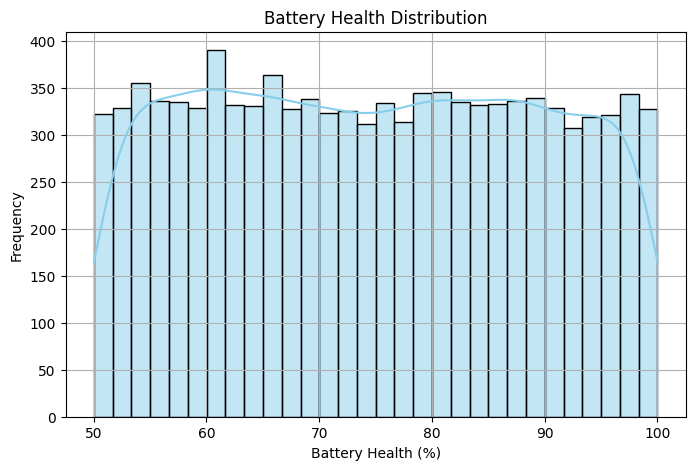

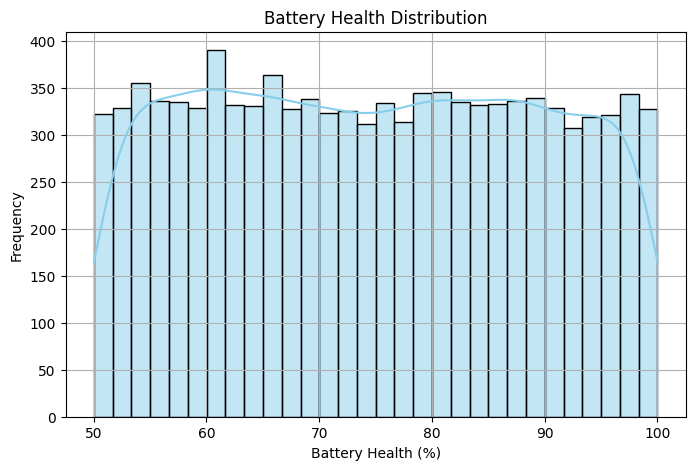

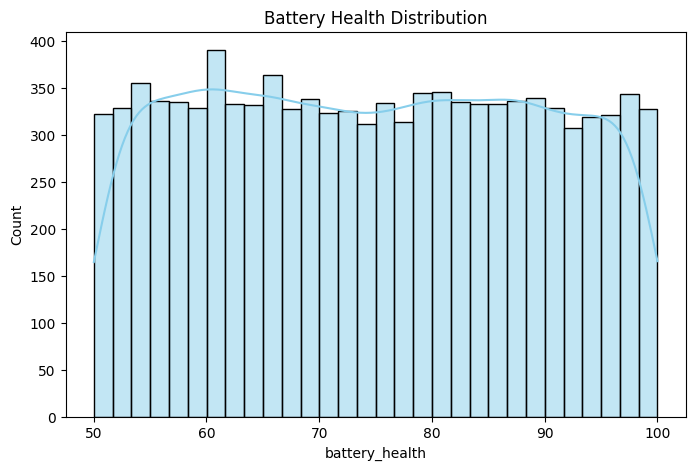

In [28]:
%matplotlib inline
plt.figure(figsize=(8,5))
sns.histplot(df['battery_health'], bins=30, kde=True, color='skyblue')
plt.title('Battery Health Distribution')
plt.show()

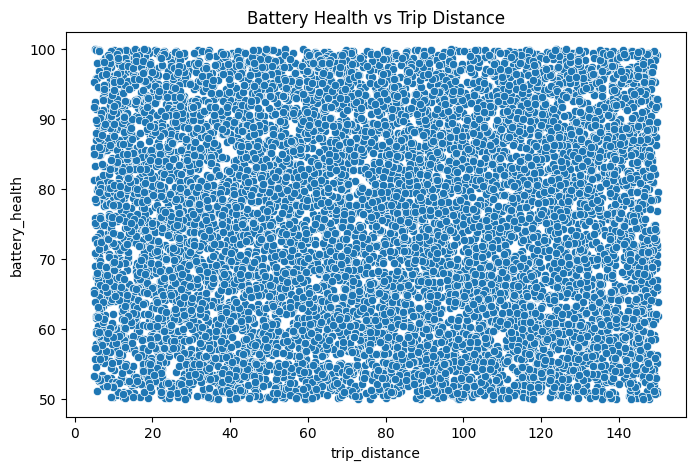

In [29]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='trip_distance', y='battery_health', data=df)
plt.title('Battery Health vs Trip Distance')
plt.show()

## EDA (basic)

In [4]:
df.describe()

,voltage,current,temperature,state_of_charge,charge_cycles,ambient_temp,speed,payload,trip_distance,charging_time,battery_health
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,350.027696,50.015728,29.963602,54.705957,522.803800,27.952872,44.880940,596.697401,77.802648,130.356716,74.835535
std,10.012045,5.000776,5.051635,25.884066,275.199412,4.040483,10.105722,231.467859,41.806928,63.739384,14.414787
min,308.566834,32.356819,10.736490,10.001418,50.000000,14.214678,0.597317,200.036529,5.008074,20.000448,50.015871
25%,343.325588,46.651337,26.625371,32.128073,285.000000,25.293091,38.135877,396.773915,41.740675,74.915588,62.262009
50%,350.077340,49.972692,29.920307,54.731031,519.500000,28.002485,44.815918,592.959863,78.468868,130.877293,74.761717
75%,356.714362,53.442050,33.340691,77.276983,763.250000,30.681746,51.675077,798.681980,113.862338,185.918299,87.266021
max,387.471901,67.941053,50.835553,99.999619,999.000000,43.690470,82.294360,999.970146,149.995649,239.989828,99.999149


## Splitting dataset for testing and training

In [5]:
X = df.drop('battery_health', axis=1)
y = df['battery_health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Battery Health Prediction Model and Prediction

In [6]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

## Evaluation

In [7]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 208.80254049554077
R2 Score: -0.015974271707708265


## Anomaly Detection Model and flagging anamalies

In [8]:
iso_forest = IsolationForest(contamination=0.02, random_state=42)
df['anomaly_score'] = iso_forest.fit_predict(X)
df['anomaly'] = df['anomaly_score'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')
df[['battery_health', 'anomaly']].head()

,battery_health,anomaly
0,79.243421,Normal
1,67.575626,Normal
2,71.341589,Normal
3,50.234304,Normal
4,57.870193,Normal


In [9]:
df['anomaly'].value_counts()

anomaly
Normal     9800
Anomaly     200
Name: count, dtype: int64